In [1]:
import torch
#import torch_directml
from kmeans_pytorch import kmeans
from datasets import Dataset
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['labels']:
        if d == 0:
            colors.append('yellow')
        if d == 1:
            colors.append('green')
        if d == 2:
            colors.append('black')
    # add them to the data frame
    dataframe['colors'] = colors

# Test KMeans sklearn
### I don't really see an option to use the GPU with sklearn's KMeans

In [4]:
tensor_test = torch.tensor([[1,1,1.2,1],[1,1,1,1.1],[2,2,2,1],[2,2,2,2],[3,2,3,3],[1,1,1,1.3],[1,1,1,1],[3,3,3,3],[1,1,2,1],[3,2,3,3],[3,3,2.7,3],[3,3,2.5,3],[1,1,1.4,1]])
tensor_test

tensor([[1.0000, 1.0000, 1.2000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.1000],
        [2.0000, 2.0000, 2.0000, 1.0000],
        [2.0000, 2.0000, 2.0000, 2.0000],
        [3.0000, 2.0000, 3.0000, 3.0000],
        [1.0000, 1.0000, 1.0000, 1.3000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [3.0000, 3.0000, 3.0000, 3.0000],
        [1.0000, 1.0000, 2.0000, 1.0000],
        [3.0000, 2.0000, 3.0000, 3.0000],
        [3.0000, 3.0000, 2.7000, 3.0000],
        [3.0000, 3.0000, 2.5000, 3.0000],
        [1.0000, 1.0000, 1.4000, 1.0000]])

In [6]:
kmeans_sk = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=100,
    max_iter=500,
    verbose=1).fit(tensor_test)

Initialization complete
Iteration 0, inertia 4.769999938011182
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.939999828338642
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.070000009536756
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4.589999923706074
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.319999890327466
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.319999890327466
Iteration 1, inertia 2.7586666199366325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.239999899864216
Iteration 1, inertia 2.7586666199366325
Con

In [5]:
# add KMean labels to dataframe
df = pd.DataFrame(tensor_test)
df['labels'] = kmeans_sk.labels_
df

,0,1,2,3,labels
0,1.0,1.0,1.2,1.0,0
1,1.0,1.0,1.0,1.1,0
2,2.0,2.0,2.0,1.0,2
3,2.0,2.0,2.0,2.0,2
4,3.0,2.0,3.0,3.0,1
5,1.0,1.0,1.0,1.3,0
6,1.0,1.0,1.0,1.0,0
7,3.0,3.0,3.0,3.0,1
8,1.0,1.0,2.0,1.0,0
9,3.0,2.0,3.0,3.0,1


In [6]:
# transform KMean & add coordinates to dataframe
kmeans_sk_transformed = kmeans_sk.transform(tensor_test)
df['x'] = kmeans_sk_transformed[:,[0]]
df['y'] = kmeans_sk_transformed[:,[1]]
df['z'] = kmeans_sk_transformed[:,[2]]
add_color_column(df)
df

,0,1,2,3,labels,x,y,z,colors
0,1.0,1.0,1.2,1.0,0,0.094281,3.640000,1.700000,yellow
1,1.0,1.0,1.0,1.1,0,0.268742,3.681793,1.777639,yellow
2,2.0,2.0,2.0,1.0,2,1.594435,2.462844,0.500000,black
3,2.0,2.0,2.0,2.0,2,1.846318,1.750885,0.500000,black
4,3.0,2.0,3.0,3.0,1,3.426693,0.620967,2.061553,green
5,1.0,1.0,1.0,1.3,0,0.354338,3.582681,1.743560,yellow
6,1.0,1.0,1.0,1.0,0,0.274874,3.734381,1.802776,yellow
7,3.0,3.0,3.0,3.0,1,3.839560,0.430813,2.291288,green
8,1.0,1.0,2.0,1.0,0,0.736357,3.356427,1.500000,yellow
9,3.0,2.0,3.0,3.0,1,3.426693,0.620967,2.061553,green


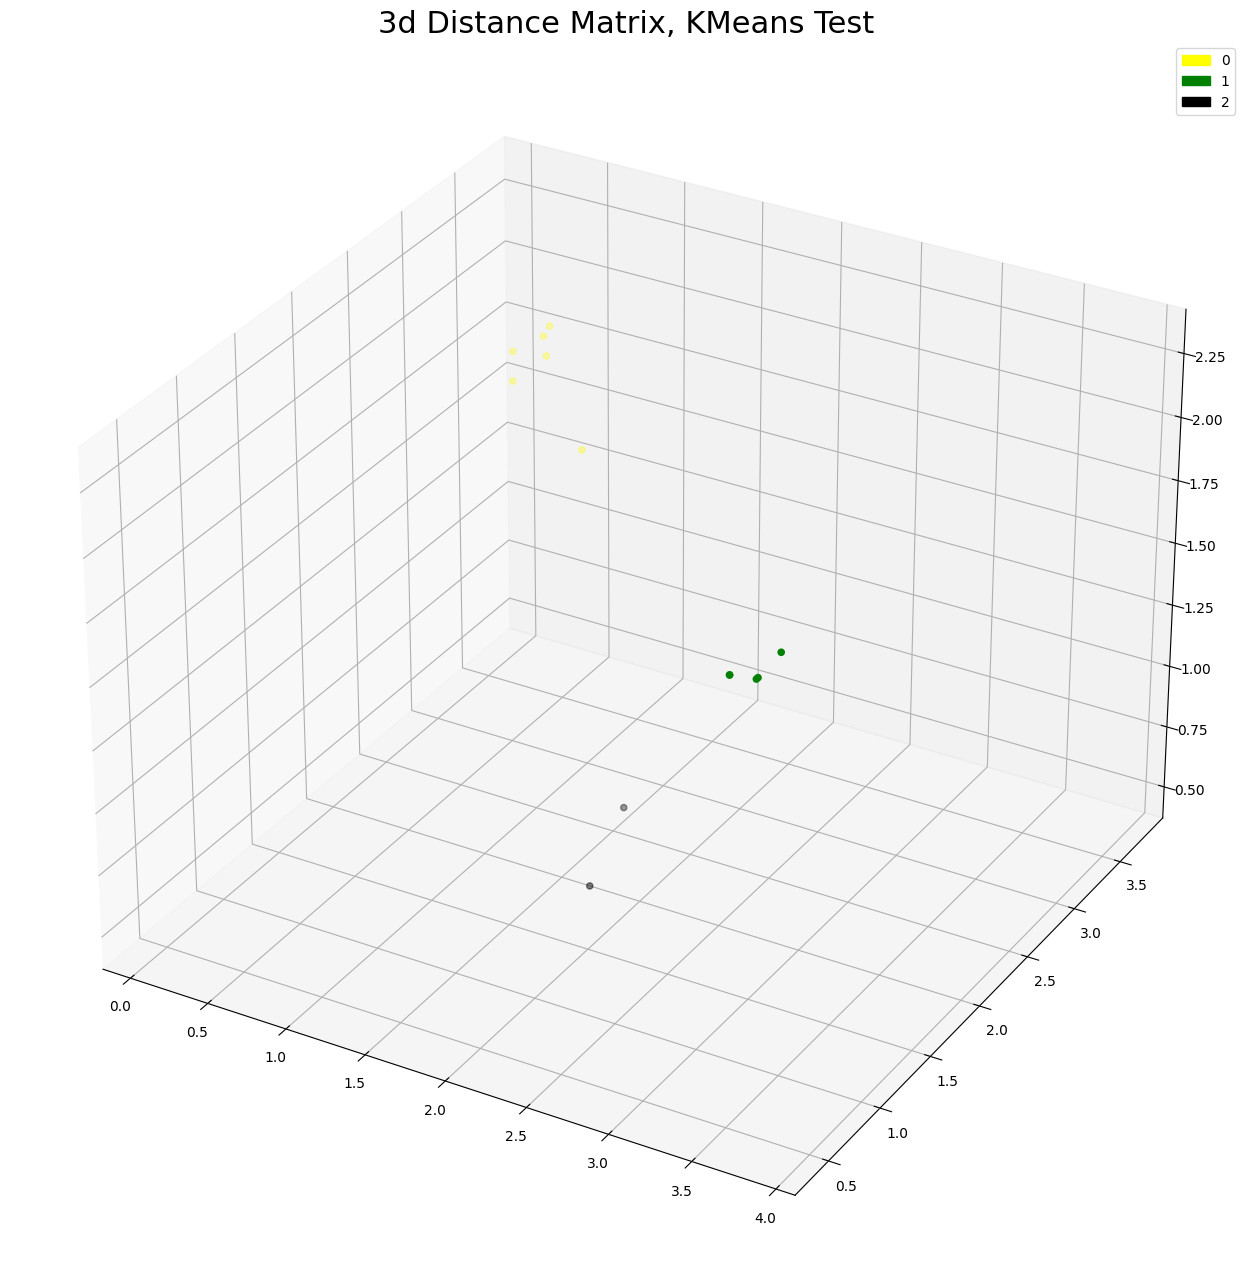

In [7]:
# Creating legend with color box
pop_a = mpatches.Patch(color='yellow', label=0)
pop_b = mpatches.Patch(color='green', label=1)
pop_c = mpatches.Patch(color='black', label=2)
# create plot
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(projection='3d')
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df['x'], df['y'], df['z'], c=df['colors'])
# add title, legend
plt.title(f'3d Distance Matrix, KMeans Test', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c])

# Test KMeans Torch
### DirectML used to calculate KMeans on AMD GPU
### I don't know if the directML is being used to set up for cuda as well,
### But other then the set up, the device in KMeans is called ''cuda:0'' I think, should show up printing the tensor

In [8]:
# enable dml (setting up the gpu use for AMD GPUs)
dml = torch_directml.device()
tensor_test = torch.tensor([[1,1,1.2,1],[1,1,1,1.1],[2,2,2,1],[2,2,2,2],[3,2,3,3],[1,1,1,1.3],[1,1,1,1],[3,3,3,3],[1,1,2,1],[3,2,3,3],[3,3,2.7,3],[3,3,2.5,3],[1,1,1.4,1]]
                           ).to(dml) # run calculation of tensor on GPU
tensor_test

tensor([[1.0000, 1.0000, 1.2000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.1000],
        [2.0000, 2.0000, 2.0000, 1.0000],
        [2.0000, 2.0000, 2.0000, 2.0000],
        [3.0000, 2.0000, 3.0000, 3.0000],
        [1.0000, 1.0000, 1.0000, 1.3000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [3.0000, 3.0000, 3.0000, 3.0000],
        [1.0000, 1.0000, 2.0000, 1.0000],
        [3.0000, 2.0000, 3.0000, 3.0000],
        [3.0000, 3.0000, 2.7000, 3.0000],
        [3.0000, 3.0000, 2.5000, 3.0000],
        [1.0000, 1.0000, 1.4000, 1.0000]], device='privateuseone:0')

In [9]:
cluster_ids_x, cluster_centers = kmeans(
    X=tensor_test,
    num_clusters=3,
    distance='euclidean',
    device=torch.device('privateuseone:0')  # 'cuda:0'
)

running k-means on privateuseone:0..


[running kmeans]: 2it [00:00, 13.00it/s, center_shift=0.000000, iteration=2, tol=0.000100]


In [10]:
cluster_ids_x, cluster_centers

(tensor([0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0]),
 tensor([[1.0000, 1.0000, 1.2667, 1.0667],
         [2.0000, 2.0000, 2.0000, 1.5000],
         [3.0000, 2.6000, 2.8400, 3.0000]]))

In [11]:
df = pd.DataFrame(tensor_test.cpu())
df['labels'] = cluster_ids_x
df

,0,1,2,3,labels
0,1.0,1.0,1.2,1.0,0
1,1.0,1.0,1.0,1.1,0
2,2.0,2.0,2.0,1.0,1
3,2.0,2.0,2.0,2.0,1
4,3.0,2.0,3.0,3.0,2
5,1.0,1.0,1.0,1.3,0
6,1.0,1.0,1.0,1.0,0
7,3.0,3.0,3.0,3.0,2
8,1.0,1.0,2.0,1.0,0
9,3.0,2.0,3.0,3.0,2


# Run with real data

again, don't know how to set up cuda, but I think the procedure should be similar

In [2]:
data = Dataset.load_from_disk("../data/embeddings")
ids = data["id"]
embeds = data["embeddings"]

In [3]:
tensor = embeds.squeeze(1).flatten(start_dim=1)
print(tensor)
print(tensor.shape)

tensor([[-0.2037,  0.1079, -0.1728,  ...,  0.3987,  0.1317, -0.1410],
        [-0.6638,  0.1531, -0.1323,  ...,  0.2645,  0.3150, -0.1552],
        [-0.1667, -0.3558, -0.2078,  ...,  0.2834,  0.2975, -0.1766],
        ...,
        [-0.5214, -0.1002,  0.4569,  ...,  0.0018, -0.0527, -0.3724],
        [-0.1427, -0.0531,  0.1441,  ...,  0.4747,  0.2064, -0.2594],
        [-0.2161,  0.1193, -0.0065,  ...,  0.2410,  0.0879, -0.2387]])
torch.Size([7908, 393216])


In [4]:
num_clusters = 12

In [5]:
# # set up direct ml
# try:
#     tensor_dml = tensor.to(dml)
# except RuntimeError:
#     print(RuntimeError)
#     tensor_dml = None

fails for me, I'm guessing I don't have enough (Memory) RAM, VRAM or something else
still trying to figure out what the error is

In [6]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=tensor,
    num_clusters=num_clusters,
    distance='euclidean',
    device=torch.device('cpu')
)

running k-means on cpu..


RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 149258502144 bytes.

In [ ]:
df = pd.DataFrame(tensor.cpu())
df['labels'] = cluster_ids_x
df

In [6]:
kmeans_sk = KMeans(
    n_clusters=num_clusters,
    init="k-means++",
    max_iter=200,
    verbose=2).fit(tensor)

Initialization complete
Iteration 0, inertia 119139956.95290712
Iteration 1, inertia 71777760.60372432
Iteration 2, inertia 70718007.4187667
Iteration 3, inertia 70266107.44794771
Iteration 4, inertia 70101350.2775715
Iteration 5, inertia 70021057.02558844
Iteration 6, inertia 69970995.04220888
Iteration 7, inertia 69940051.32396135
Iteration 8, inertia 69916792.6024459
Iteration 9, inertia 69902300.7705167
Iteration 10, inertia 69892678.21983875
Iteration 11, inertia 69884849.3166455
Iteration 12, inertia 69879336.81415825
Iteration 13, inertia 69874661.25979164
Iteration 14, inertia 69869134.51731677
Iteration 15, inertia 69863135.22550845
Iteration 16, inertia 69857750.11355644
Iteration 17, inertia 69854418.6670005
Iteration 18, inertia 69851277.99651755
Iteration 19, inertia 69849093.43007368
Iteration 20, inertia 69846659.01038927
Iteration 21, inertia 69844791.33395584
Iteration 22, inertia 69842446.93384086
Iteration 23, inertia 69839839.0975727
Iteration 24, inertia 69837422.6

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 179, in where
KeyboardInterrupt: 


Iteration 51, inertia 69425622.63057996
Iteration 52, inertia 69425562.88626055
Iteration 53, inertia 69425468.7620426


Iteration 54, inertia 69425408.33233692
Iteration 55, inertia 69425265.23380962
Iteration 56, inertia 69425048.90656428
Iteration 57, inertia 69424912.4731341
Iteration 58, inertia 69424827.46964517
Iteration 59, inertia 69424748.3789411
Iteration 60, inertia 69424721.94709063
Converged at iteration 60: strict convergence.


In [ ]:
import numpy as np
np.save("../data/kmeans_sk.npy", kmeans_sk.labels_)